In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/EXCELR/Assignments/book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [2]:
df.shape

(2000, 11)

In [3]:
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [4]:
list(df)
df.value_counts()


ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0         0         0        0         0       0       0        0         0          0        0           421
1         0         0        0         0       0       0        0         0          0        0           136
0         0         1        0         0       0       0        0         0          0        0           133
                    0        1         0       0       0        0         0          0        0            67
                             0         0       0       0        0         0          0        1            58
                                                                                                         ... 
1         0         1        1         1       1       0        0         1          1        1             1
0         0         1        1         1       1       1        0         0          0        0             1
1         0      

In [5]:
df.values[0]


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [6]:
df.values[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
str(df.values[0])
df["CookBks"].value_counts()


0    1138
1     862
Name: CookBks, dtype: int64

In [8]:
df["ChildBks"].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

C:\Users\SUMEDH LIKHAR\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


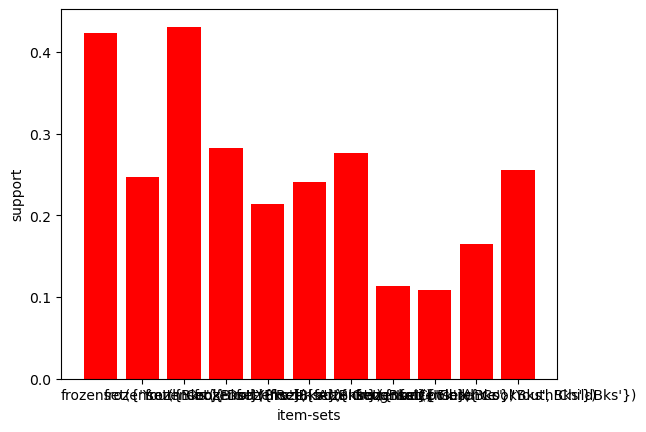

In [9]:
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(0,11)),height = frequent_itemsets.support[0:11],color='red')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets'),plt.ylabel('support')
plt.show()

In [10]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [11]:
rules.to_csv("rules.csv")

In [14]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [15]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
246,"(CookBks, GeogBks)",(RefBks),0.1925,0.2145,0.0890,0.462338,2.155420,0.047709,1.460954
270,"(DoItYBks, ArtBks)",(RefBks),0.1235,0.2145,0.0535,0.433198,2.019573,0.027009,1.385846
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
44,(ArtBks),(RefBks),0.2410,0.2145,0.0895,0.371369,1.731325,0.037805,1.249541
66,"(ChildBks, RefBks)",(YouthBks),0.1515,0.2475,0.0830,0.547855,2.213555,0.045504,1.664288
...,...,...,...,...,...,...,...,...,...
78,"(ChildBks, GeogBks)",(YouthBks),0.1950,0.2475,0.0990,0.507692,2.051282,0.050738,1.528516
240,"(CookBks, ArtBks)",(RefBks),0.1670,0.2145,0.0700,0.419162,1.954134,0.034179,1.352356
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
156,"(CookBks, DoItYBks)",(YouthBks),0.1875,0.2475,0.0950,0.506667,2.047138,0.048594,1.525338


In [16]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
258,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
264,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
108,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
234,"(CookBks, DoItYBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
150,"(ChildBks, GeogBks)",(ItalCook),0.1950,0.1135,0.0525,0.269231,2.372077,0.030367,1.213105
186,"(DoItYBks, YouthBks)",(RefBks),0.1155,0.2145,0.0580,0.502165,2.341093,0.033225,1.577830
34,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
114,"(DoItYBks, ChildBks)",(RefBks),0.1840,0.2145,0.0900,0.489130,2.280328,0.050532,1.537574
138,"(ChildBks, GeogBks)",(RefBks),0.1950,0.2145,0.0940,0.482051,2.247325,0.052172,1.516559
